In [1]:
import os 
import numpy as np
import pandas as pd
import numpy as np

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from datetime import datetime


In [2]:
mfx = np.load('/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfx/2009-01-24_mfx.npz')['arr_0']
mfy = np.load('/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfy/2009-01-24_mfy.npz')['arr_0']

grid = map_grid(grid_size='40', source='airs')

lon = grid.nh_lon
lat = grid.nh_lat

In [3]:
# Create a grid of longitude and latitude values
lon = np.linspace(-180, 180, mfx.shape[1])
lat = np.linspace(-90, 90, mfx.shape[0])

# Create a longitude-latitude grid for plotting
lon_grid, lat_grid = np.meshgrid(lon, lat)

In [12]:
# grid_size = 40
# nh_lon = np.genfromtxt(f'coordinates_{grid_size}km_grid/Airs_nh_lon_{grid_size}_grid.csv', delimiter=',')
# nh_lat = np.genfromtxt(f'coordinates_{grid_size}km_grid/Airs_nh_lat_{grid_size}_grid.csv', delimiter=',')


In [4]:
np.shape(lon_grid)

(501, 501)

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_61311/620198688.py:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu')


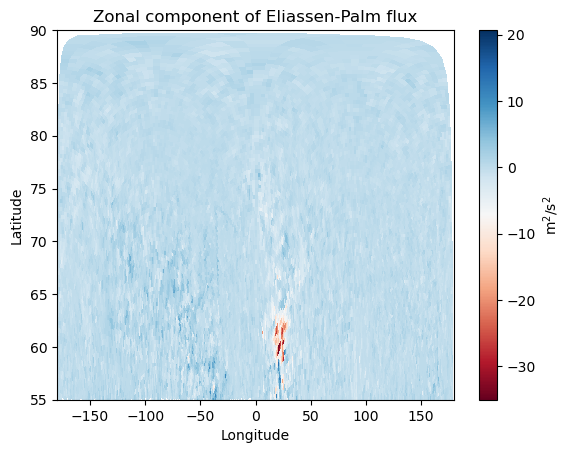

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_61311/620198688.py:44: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_meridional, cmap='RdBu')


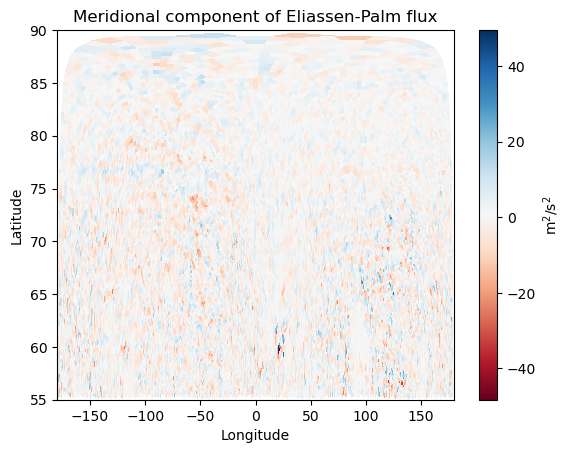

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the latitude and Coriolis parameter
lat_rad = np.deg2rad(45)  # latitude in radians
f = 2 * np.pi / (24 * 3600) * np.sin(lat_rad)  # Coriolis parameter

# Calculate the zonal and meridional wind components from the momentum flux
u = mfx / (f * np.cos(lat_rad))
v = mfy / f

# Calculate the derivatives of the wind components
du_dx, _ = np.gradient(u)
_, dv_dy = np.gradient(v)

# Calculate the stress tensor
tau_zonal = -mfx
tau_meridional = -mfy

# Calculate the Eliassen-Palm flux
epf_zonal = tau_zonal * v - tau_meridional * u
epf_meridional = tau_zonal * du_dx + tau_meridional * dv_dy

# Create a grid of longitude and latitude values
lon = np.linspace(-180, 180, mfx.shape[1])
lat = np.linspace(-90, 90, mfx.shape[0])

# Create a longitude-latitude grid for plotting
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Plot the zonal component of the Eliassen-Palm flux
fig, ax = plt.subplots()
pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_zonal, cmap='RdBu')
ax.set_title('Zonal component of Eliassen-Palm flux')
fig.colorbar(pcm, ax=ax, label='m$^2$/s$^2$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_ylim([55, 90])

plt.show()

# Plot the meridional component of the Eliassen-Palm flux
fig, ax = plt.subplots()
pcm = ax.pcolormesh(grid.nh_lon, grid.nh_lat, epf_meridional, cmap='RdBu')
ax.set_title('Meridional component of Eliassen-Palm flux')
fig.colorbar(pcm, ax=ax, label='m$^2$/s$^2$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_ylim([55, 90])

plt.show()


In [8]:
np.shape(lon_grid)

(501, 501)

In [10]:
np.shape(grid.nh_lon)

(501, 501)